In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
data = pd.read_csv('onlinefraud.csv')
data.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138116 entries, 0 to 138115
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            138116 non-null  int64  
 1   type            138116 non-null  object 
 2   amount          138116 non-null  float64
 3   nameOrig        138116 non-null  object 
 4   oldbalanceOrg   138116 non-null  float64
 5   newbalanceOrig  138116 non-null  float64
 6   nameDest        138116 non-null  object 
 7   oldbalanceDest  138115 non-null  float64
 8   newbalanceDest  138115 non-null  float64
 9   isFraud         138115 non-null  float64
 10  isFlaggedFraud  138115 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 11.6+ MB


In [ ]:
data.describe()


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,138116.000000,1.381160e+05,1.381160e+05,1.381160e+05,1.381150e+05,1.381150e+05,138115.000000,138115.0
mean,9.126553,1.784274e+05,8.957970e+05,9.121265e+05,9.069548e+05,1.183330e+06,0.000883,0.0
std,1.868878,3.417495e+05,2.824668e+06,2.861606e+06,2.386388e+06,2.726211e+06,0.029708,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,1.088971e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,6.007116e+04,2.003750e+04,0.000000e+00,3.084900e+04,8.544306e+04,0.000000,0.0
75%,10.000000,2.210857e+05,1.963066e+05,2.247515e+05,6.666913e+05,1.114277e+06,0.000000,0.0
max,11.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.490552e+07,3.894623e+07,1.000000,0.0


In [ ]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


Categorical variables: 3
Integer variables: 1
Float variables: 7


<Axes: xlabel='type', ylabel='count'>

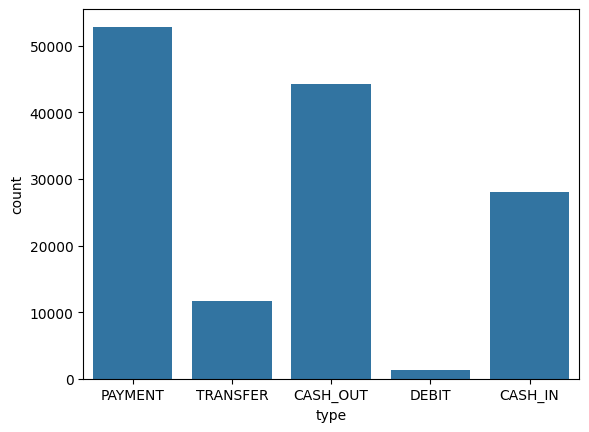

In [ ]:
sns.countplot(x='type', data=data)


<Axes: xlabel='type', ylabel='amount'>

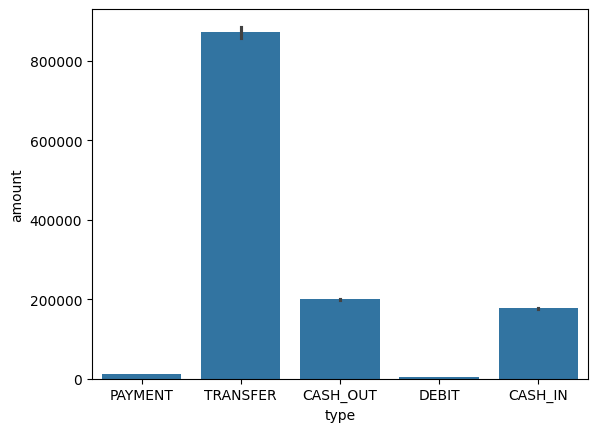

In [ ]:
sns.barplot(x='type', y='amount', data=data)


In [ ]:
data['isFraud'].value_counts()


0.0    137993
1.0       122
Name: isFraud, dtype: int64

<ipython-input-9-d1bba932735e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['step'], bins=50)


<Axes: xlabel='step', ylabel='Density'>

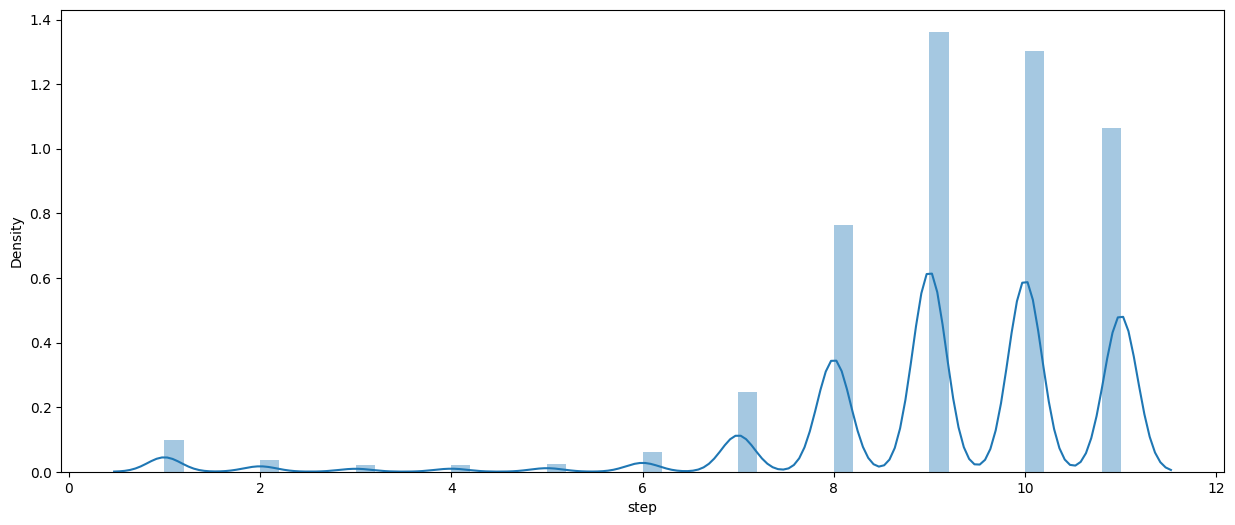

In [ ]:
plt.figure(figsize=(15, 6))
sns.distplot(data['step'], bins=50)


<ipython-input-10-b69deaa7993a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),


<Axes: >

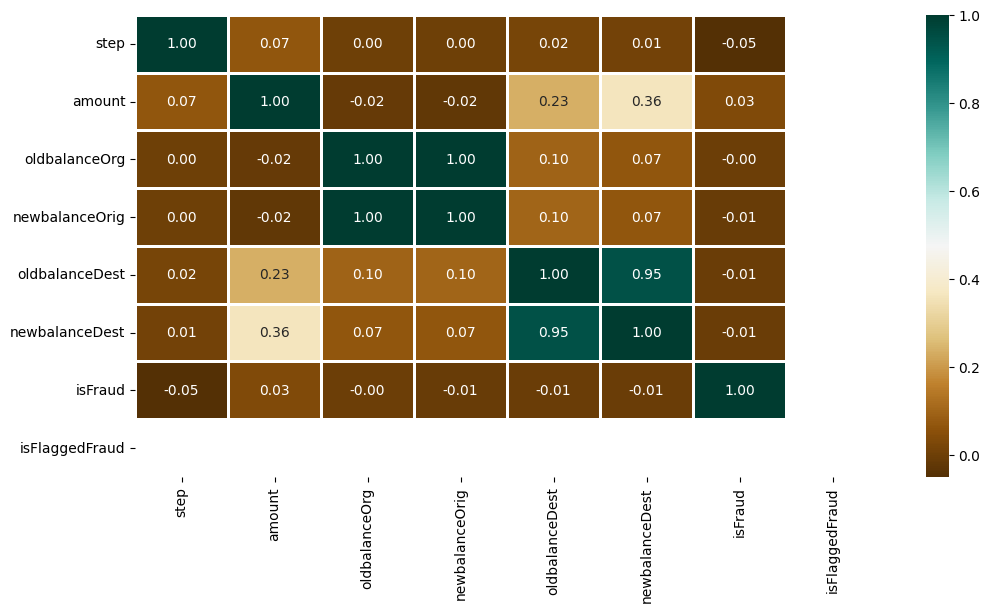

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)


In [ ]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0,0,0,1,0


In [ ]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']


In [ ]:
X.shape, y.shape


((138116, 11), (138116,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.3, random_state=42)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as ras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [ ]:
models = [LogisticRegression(), XGBClassifier(),
		SVC(kernel='rbf', probability=True),
		RandomForestClassifier(n_estimators=7,
								criterion='entropy',
								random_state=7)]

for i in range(len(models)):
	models[i].fit(X_test, y_test)
	print(f'{models[i]} : ')

	train_preds = models[i].predict_proba(X_test)[:, 1]
	print('Training Accuracy : ', ras(y_test, train_preds))

	y_preds = models[i].predict_proba(X_test)[:, 1]
	print('Validation Accuracy : ', ras(y_test, y_preds))
	print()


LogisticRegression() : 
Training Accuracy :  0.9545627779522318
Validation Accuracy :  0.9545627779522318

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  1.0

SVC(probability=True) : 
Training Accuracy :  0.8615163812330411
Validation Acc